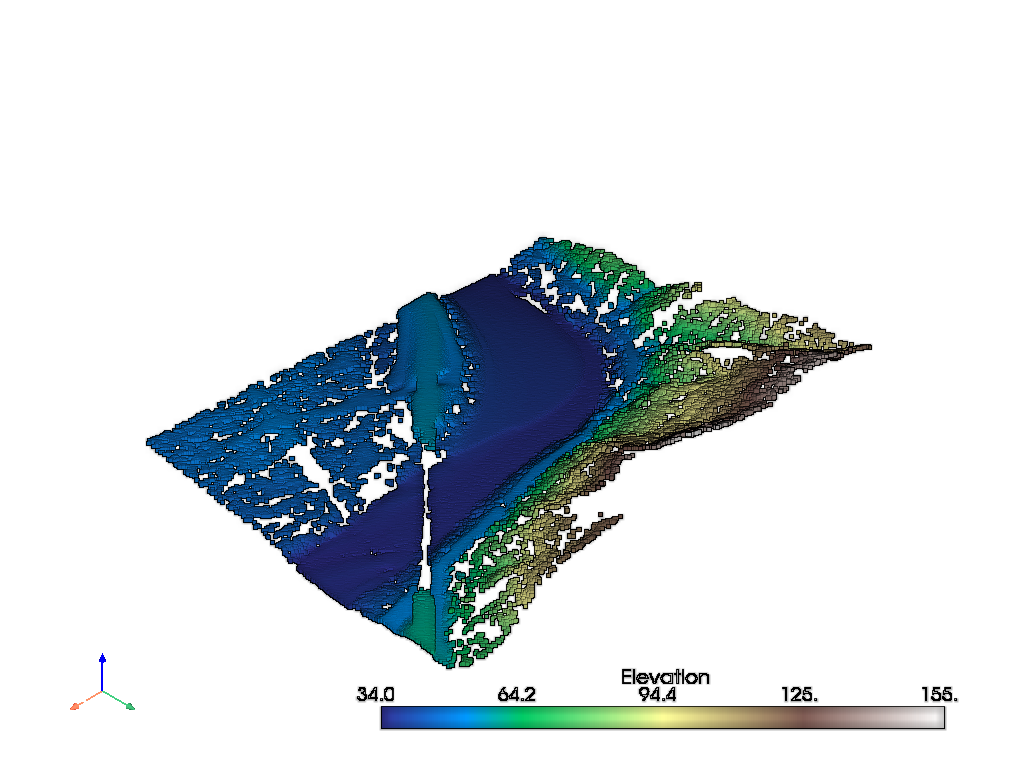

In [29]:
import leafmap
from laspy import LasData

filename = 'realworld.las'

las: LasData = leafmap.read_lidar(filename=filename)  # type: ignore

leafmap.view_lidar(filename=filename, cmap='terrain',
                   backend='pyvista', background='white', eye_dome_lighting=True)

In [25]:
n = int(input('Nhập số cụm: '))
max_iter = int(input('Nhập số lần lặp: '))

In [26]:
import csv
import numpy as np
import pyvista as pv

# Lấy danh sách độ cao
z = las.Z.reshape(-1, 1) # type: ignore

def write_csv(filename: str, labels: np.ndarray):
    with open(filename, 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['x', 'y', 'z', 'label'])
        for i, label in enumerate(labels):
            writer.writerow([las.X[i], las.Y[i], las.Z[i], label])

def plot3D(labels: np.ndarray):
    """Hàm vẽ mô hình 3D

    Args:
        labels np.ndarray: Danh sách nhãn
    """
    ulabels: list[int] = np.unique(labels).tolist()
    annotations = {i: f'Cluster {i}' for i in ulabels}

    pd = pv.PolyData(las.xyz)
    pd.point_data['clusters'] = labels
    pd.plot(background='white', categories=True,
            eye_dome_lighting=True, scalar_bar_args={'n_labels': 0}, annotations=annotations)

## Thuật toán K-Mean

Tâm cụm 0: [3701.09915895]
Tâm cụm 1: [10443.15557028]
Tâm cụm 2: [5268.47717567]
Cụm 0 có 98448 phần tử
Cụm 1 có 9056 phần tử
Cụm 2 có 58776 phần tử


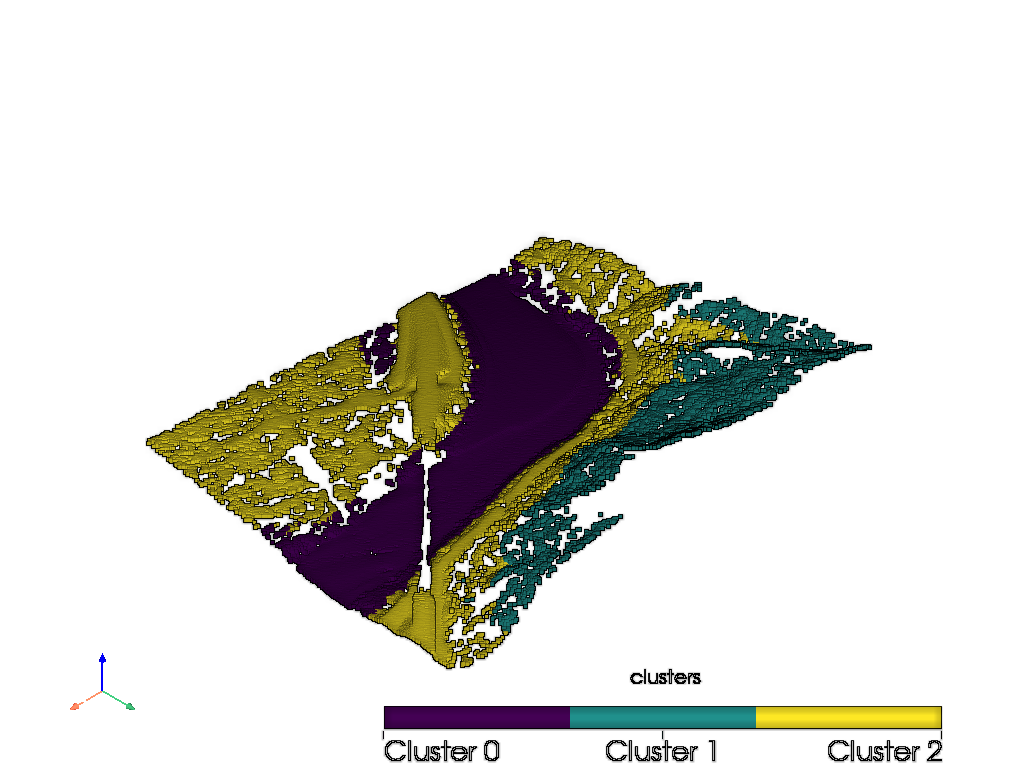

In [27]:
from sklearn.cluster import KMeans

# Thực hiện thuật toán K-Means phân cụm theo độ cao
kmean = KMeans(n_clusters=n, random_state=0, max_iter=max_iter).fit(z)
labels = kmean.predict(z)

for i, c_z in enumerate(kmean.cluster_centers_):
    print(f'Tâm cụm {i}: {c_z}')

for i, count in enumerate(np.bincount(labels)):
    print(f'Cụm {i} có {count} phần tử')

write_csv(filename='kmeans.csv', labels=labels)

plot3D(labels=labels)

## Thuật toán EM (Expectation-maximization) dạng Gaussian Mixture Models

Cụm 0 có 93151 phần tử
Cụm 1 có 12038 phần tử
Cụm 2 có 61091 phần tử


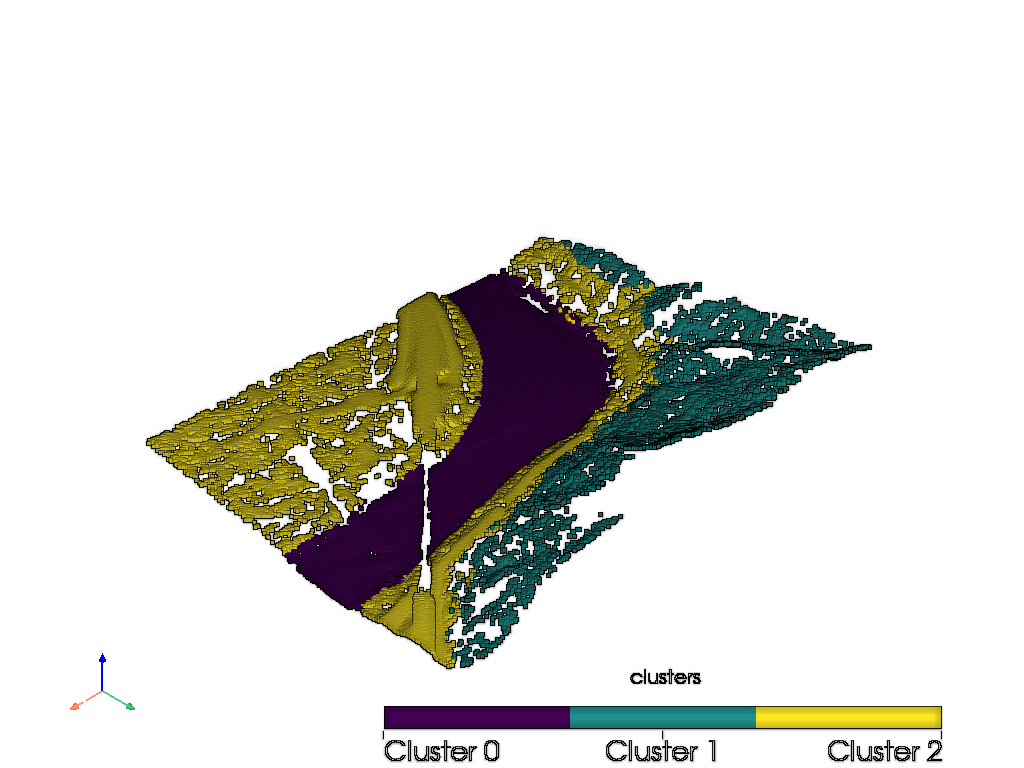

In [28]:
# https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture
from sklearn.mixture import GaussianMixture

# Thực hiện thuật toán GMM phân loại theo độ cao
em = GaussianMixture(n_components=n, max_iter=max_iter).fit(z)
labels = em.predict(z)

for i, count in enumerate(np.bincount(labels)):
    print(f'Cụm {i} có {count} phần tử')

write_csv(filename='gmm.csv', labels=labels)

plot3D(labels=labels)